In [67]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import math
%matplotlib inline
%run ./master_experminet-functions.ipynb

In [68]:
def quick_sort(df):
    sorted_df = df.sort_values(kind="quicksort")
    return sorted_df
def merge_sort(df):
    sorted_df = df.sort_values(kind="mergesort")
    return sorted_df
def heap_sort(df):
    sorted_df = df.sort_values(kind="heapsort")
    return sorted_df

In [69]:
n_samples = 100000
choices = [quick_sort,merge_sort,heap_sort]
dist_types = ["Uniform","Normal","Uniform_Sorted","Uniform_Reverse_Sorted","Uniform_Nearly_Sorted","Zipf"]
reps = 1000

In [70]:
quick_distributions = 3000*["Uniform"] + 3000*["Normal"]

In [71]:
merge_distributions = 3000*["Uniform_Sorted"]+3000*["Uniform_Reverse_Sorted"]

In [72]:
def plot_history(rewards,cum_rewards,chosen_arms ):

    fig = plt.figure(figsize=[30,8])

    ax2 = fig.add_subplot(121)
    ax2.plot(cum_rewards, label="avg rewards")
    ax2.set_title("Cummulative Rewards")
    labels = list(chosen_arms.keys())
    ax3 = fig.add_subplot(122)
    ax3.bar([i for i in range(len(chosen_arms.values()))], chosen_arms.values(), label=[i for i in ((list(chosen_arms.keys())))])
    ax3.set_title("Chosen Actions")

## Random Selection

In [73]:
#We recommend setting the reward to be the runtime of the operator during the round multiplied by −1

In [74]:
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

for n, elem in enumerate(quick_distributions):
    dist_type = elem
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

Total reward 100.0971
Average rewards per algo {'quick_sort': 0.013087249357326716, 'merge_sort': 0.015120415224913341, 'heap_sort': 0.021680019685039176}
Count per chosen algo {'quick_sort': 1945, 'merge_sort': 2023, 'heap_sort': 2032}


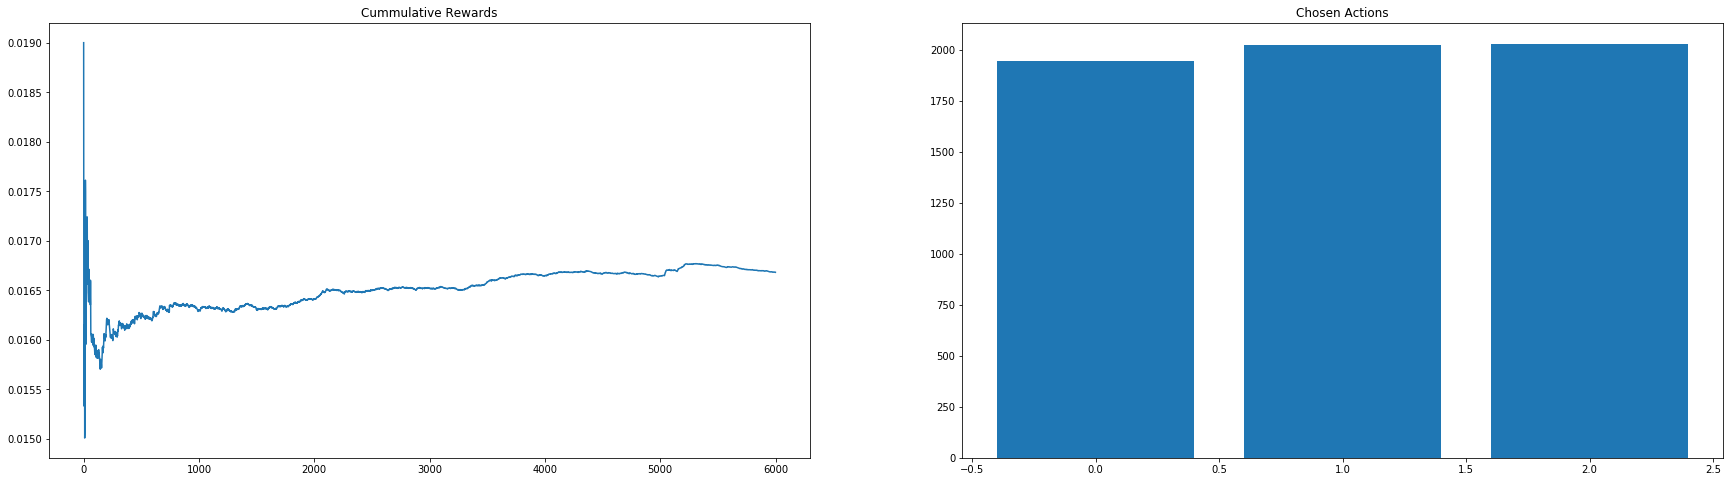

In [75]:
plot_history(rewards,cum_rewards, arm_counts )

In [76]:
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

for n, elem in enumerate(merge_distributions):
    dist_type = elem
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

Total reward 31.8874
Average rewards per algo {'quick_sort': 0.003720689655172251, 'merge_sort': 0.0025201238390092436, 'heap_sort': 0.009656764852721116}
Count per chosen algo {'quick_sort': 2059, 'merge_sort': 1938, 'heap_sort': 2003}


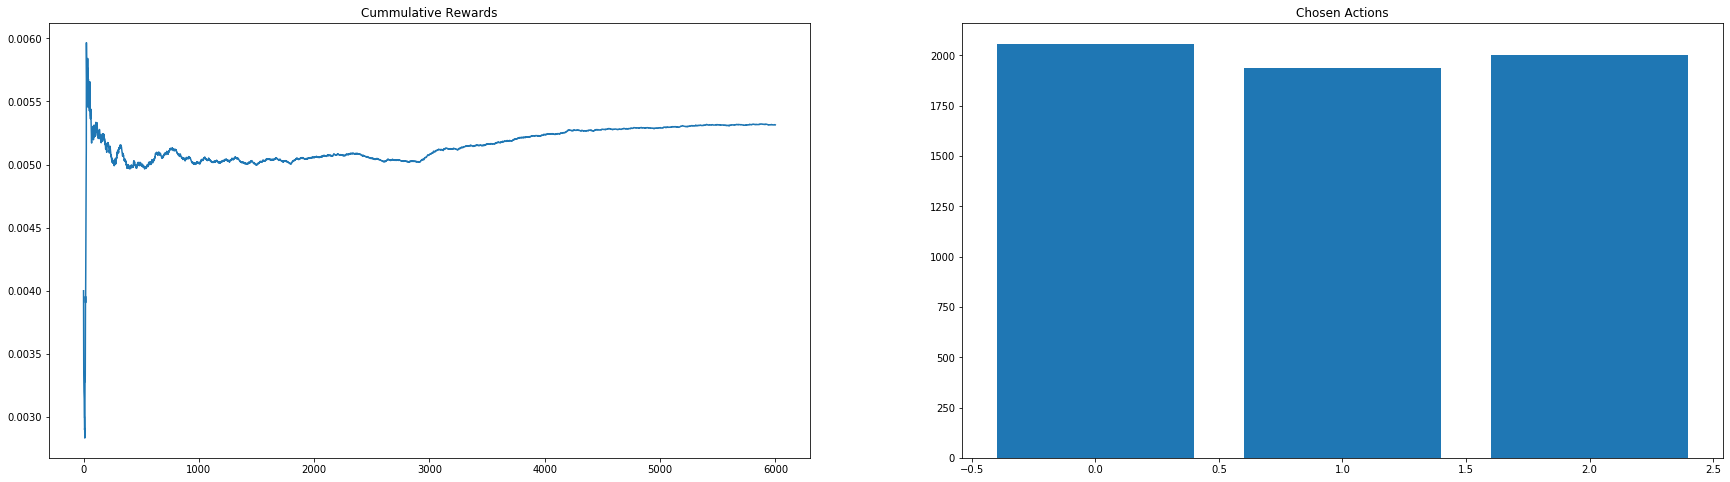

In [77]:
plot_history(rewards,cum_rewards, arm_counts )

## Epsilon-greedy
#### Exploit (1-e) of the time -> Explore (e) of the time

In [78]:
epsilon=0.01
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []


In [79]:
for n, elem in enumerate(quick_distributions):
    dist_type = elem
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices) if np.random.random() < epsilon else choices[np.argmin(list(q_values.values()))]
    #print(alg)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)


Total reward 76.3392
Average rewards per algo {'quick_sort': 0.012665673400673847, 'merge_sort': 0.014469565217391312, 'heap_sort': 0.02087297297297298}
Count per chosen algo {'quick_sort': 5940, 'merge_sort': 23, 'heap_sort': 37}


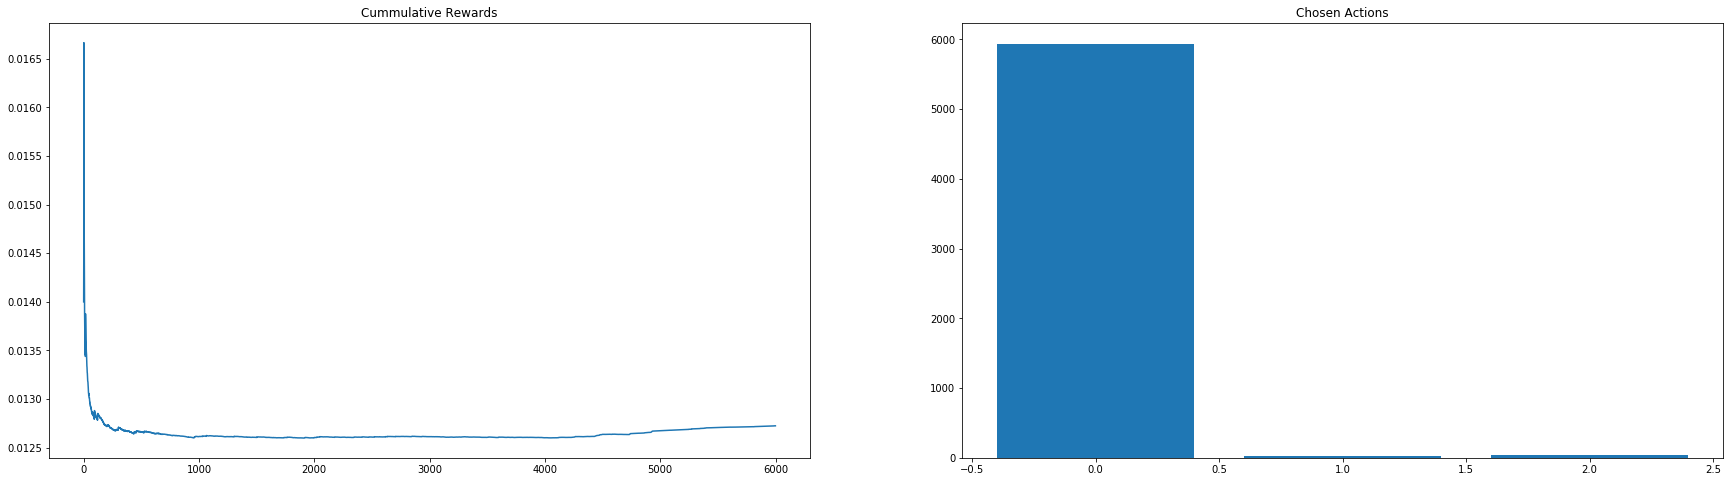

In [80]:
plot_history(rewards,cum_rewards, arm_counts)

In [81]:
epsilon=0.01
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []
for n, elem in enumerate(merge_distributions):
    dist_type = elem
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices) if np.random.random() < epsilon else choices[np.argmin(list(q_values.values()))]
    #print(alg)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)


Total reward 15.5866
Average rewards per algo {'quick_sort': 0.003760000000000001, 'merge_sort': 0.0025624537815127323, 'heap_sort': 0.009840000000000003}
Count per chosen algo {'quick_sort': 25, 'merge_sort': 5950, 'heap_sort': 25}


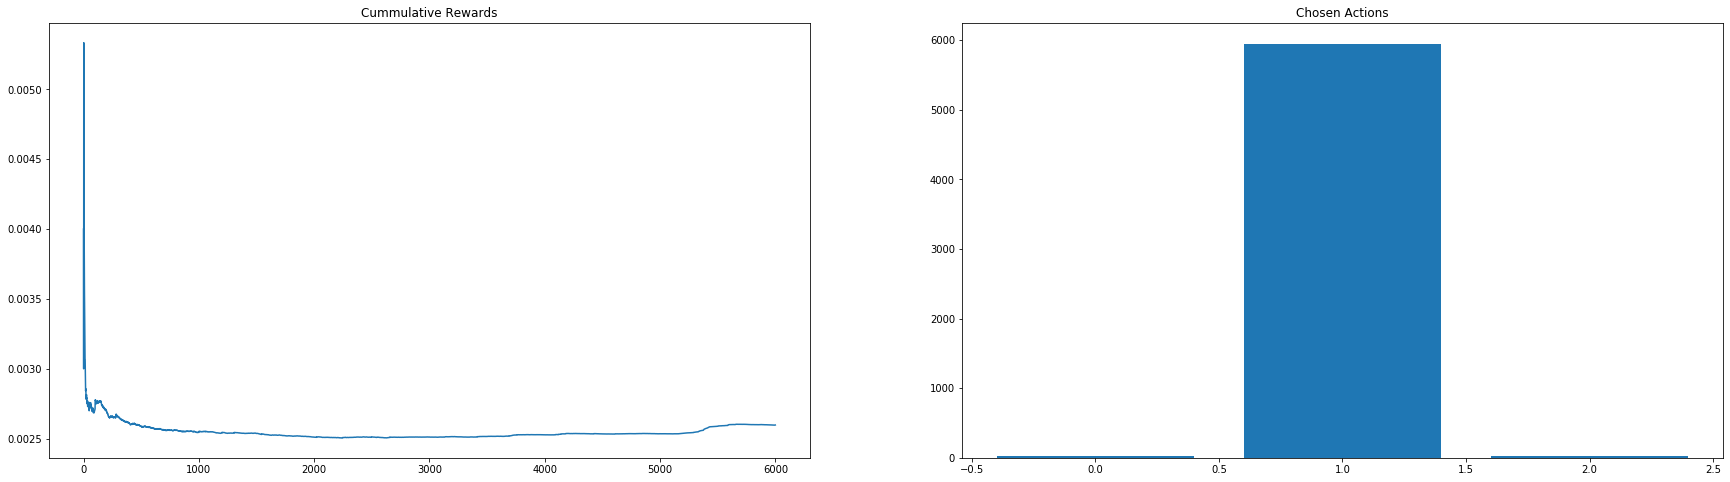

In [82]:
plot_history(rewards,cum_rewards, arm_counts)

In [83]:
epsilon=0.05
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

In [84]:
for n, elem in enumerate(quick_distributions):
    dist_type = elem
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices) if np.random.random() < epsilon else choices[np.argmin(list(q_values.values()))]
    #print(alg)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)


Total reward 78.6413
Average rewards per algo {'quick_sort': 0.012911153380598658, 'merge_sort': 0.015013333333333335, 'heap_sort': 0.021425892857142834}
Count per chosen algo {'quick_sort': 5783, 'merge_sort': 105, 'heap_sort': 112}


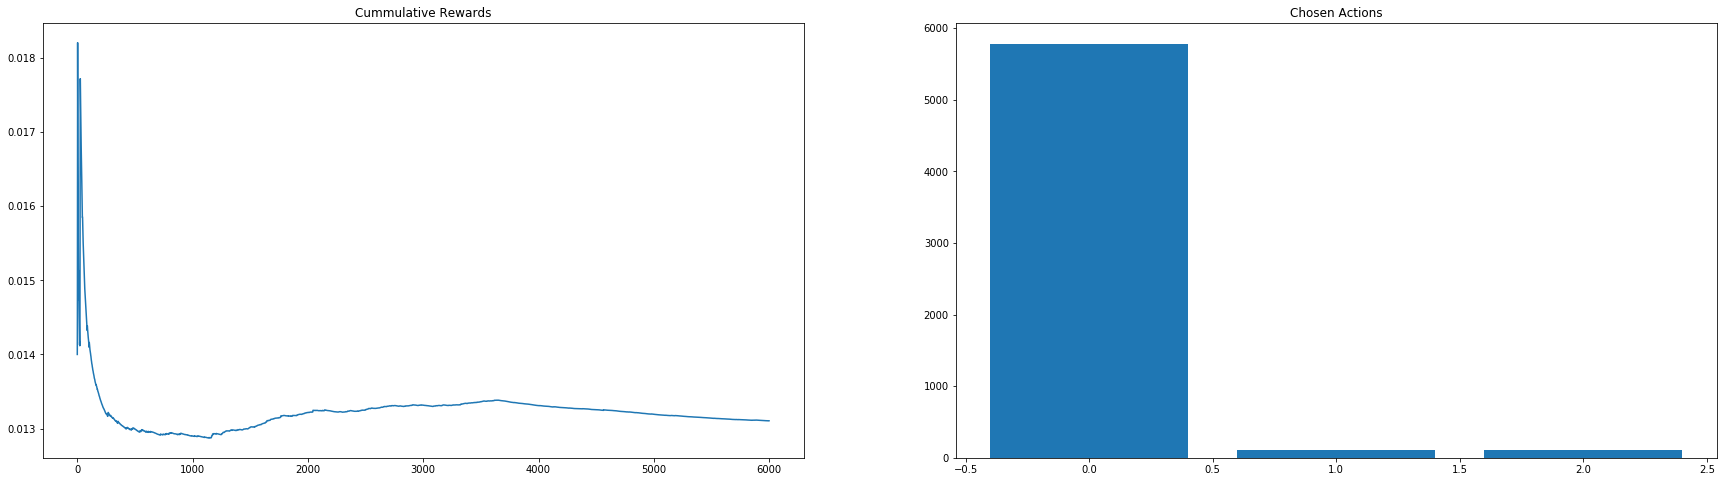

In [85]:
plot_history(rewards,cum_rewards, arm_counts)

In [86]:
epsilon=0.05
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

In [87]:
for n, elem in enumerate(merge_distributions):
    dist_type = elem
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices) if np.random.random() < epsilon else choices[np.argmin(list(q_values.values()))]
    #print(alg)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

Total reward 17.0727
Average rewards per algo {'quick_sort': 0.004279338842975209, 'merge_sort': 0.0026818229076417737, 'heap_sort': 0.009982407407407412}
Count per chosen algo {'quick_sort': 121, 'merge_sort': 5771, 'heap_sort': 108}


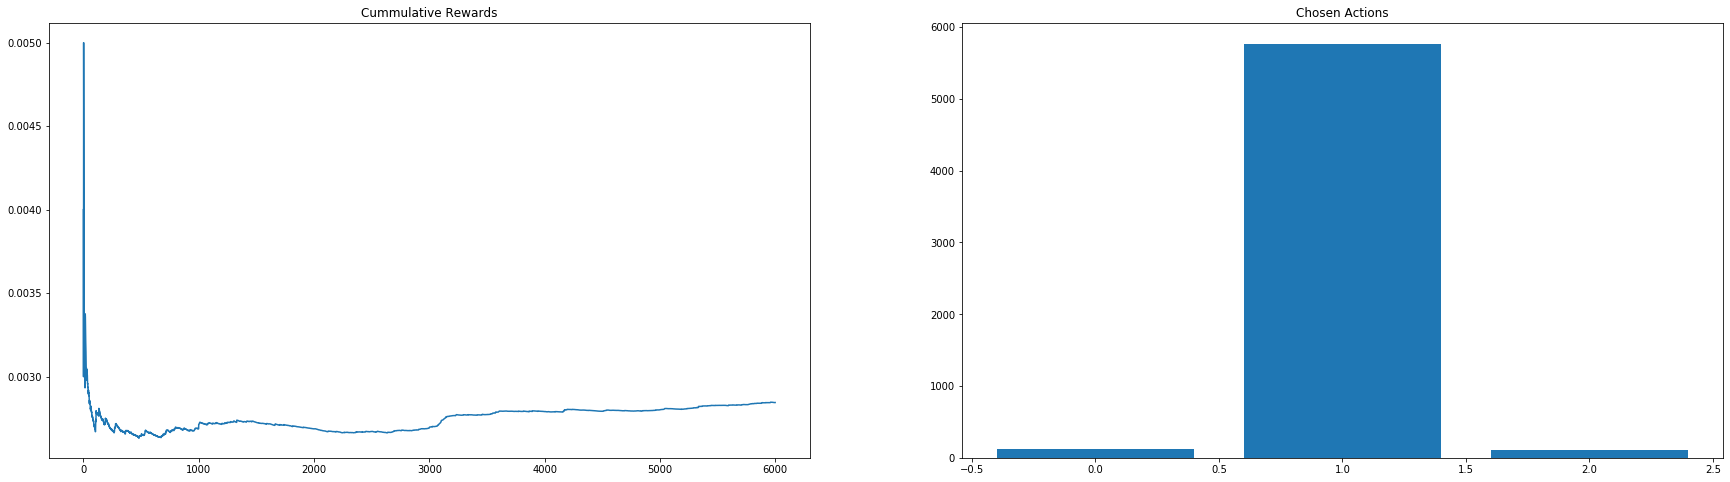

In [88]:
plot_history(rewards,cum_rewards, arm_counts)

In [89]:
epsilon=0.1
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

In [90]:
for n, elem in enumerate(quick_distributions):
    dist_type = elem
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices) if np.random.random() < epsilon else choices[np.argmin(list(q_values.values()))]
    print(alg)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E41

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E4

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E4

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E4

<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E41

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C

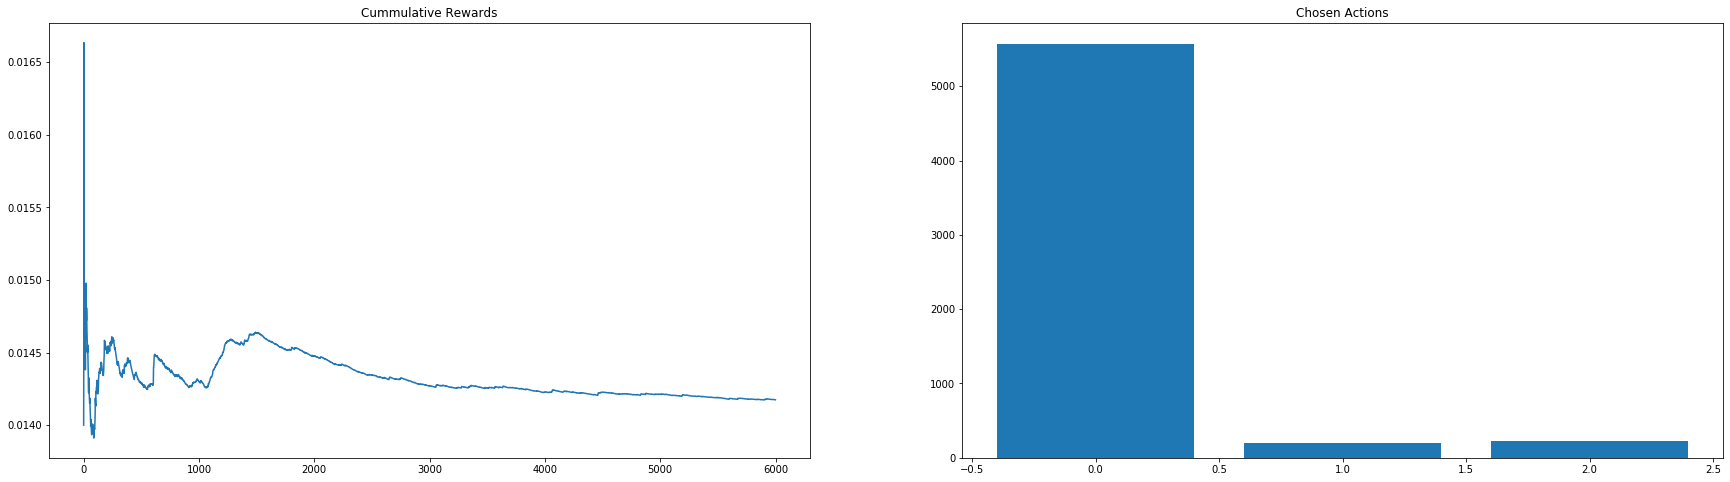

In [91]:
plot_history(rewards,cum_rewards, arm_counts)

In [92]:
epsilon=0.1
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

In [93]:
for n, elem in enumerate(merge_distributions):
    dist_type = elem
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices) if np.random.random() < epsilon else choices[np.argmin(list(q_values.values()))]
    print(alg)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E4

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E4

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E41

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E4

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E41

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E4

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E41

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E4

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E41

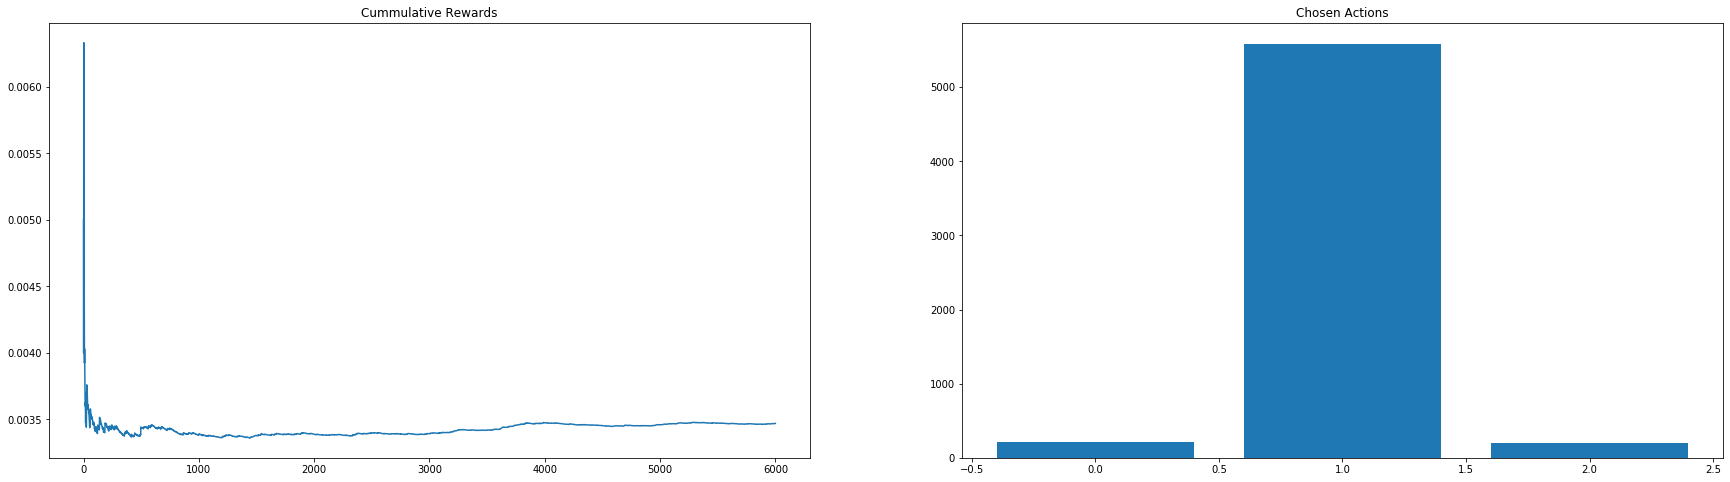

In [94]:
plot_history(rewards,cum_rewards, arm_counts)

## Thompson Sampling

# Probabs sampled from Beta distribution

In [95]:

total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
thetas = np.zeros(reps)

rewards = []
cum_rewards = []
a = {"quick_sort": 1, "merge_sort": 1, "heap_sort":1}
b = {"quick_sort": 1, "merge_sort": 1, "heap_sort":1}
theta = [0,0,0]

In [96]:
for n, elem in enumerate(quick_distributions):
    dist_type = elem
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    theta =  np.random.beta(list(a.values()),list(b.values()))
    alg = choices[np.argmin(theta)]
    print(alg)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)*(1)
    total_reward += reward
    a[alg.__name__] += reward
    b[alg.__name__] += 1 - reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function heap_sort at 0x000001E40E3EE948>
<function heap_sort at 0x000001E40E3EE948>
<function heap_sort at 0x000001E40E3EE948>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE94

<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75

<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E41

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E4

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E

<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E41

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E41

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E4

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E4

<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E4

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E4

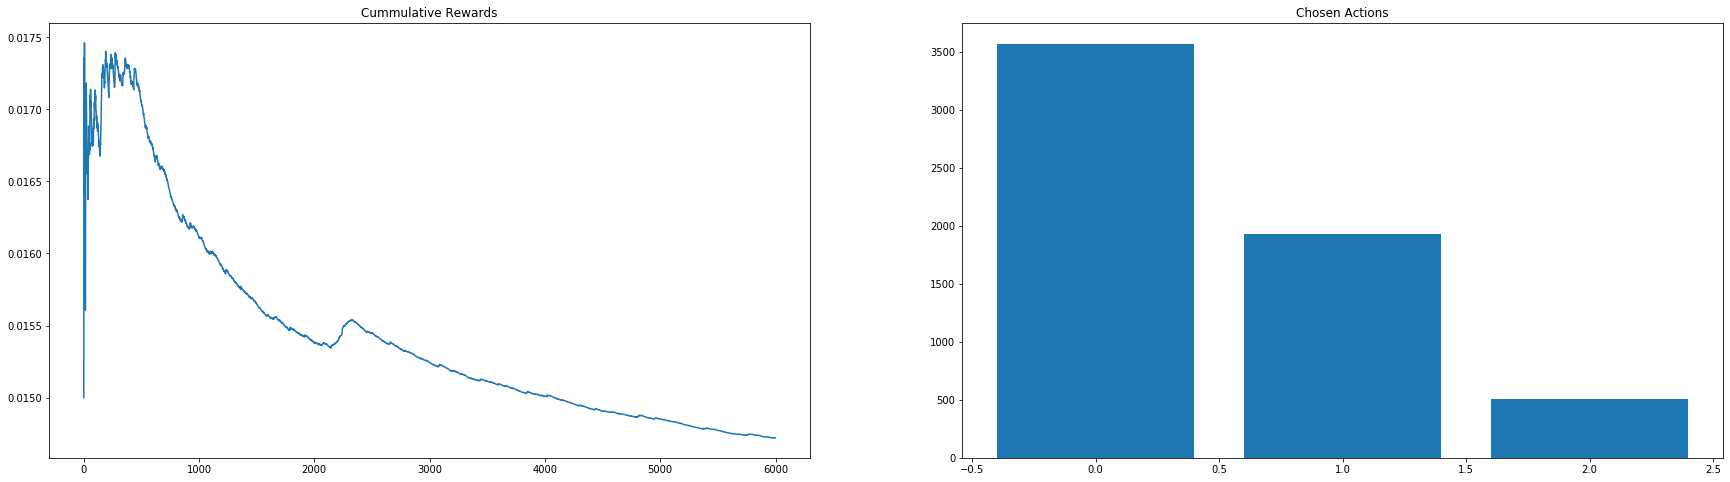

In [97]:
plot_history(rewards,cum_rewards, arm_counts)

In [98]:

total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
thetas = np.zeros(reps)

rewards = []
cum_rewards = []
a = {"quick_sort": 1, "merge_sort": 1, "heap_sort":1}
b = {"quick_sort": 1, "merge_sort": 1, "heap_sort":1}
theta = [0,0,0]

In [99]:
for n, elem in enumerate(merge_distributions):
    dist_type = elem
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    theta =  np.random.beta(list(a.values()),list(b.values()))
    alg = choices[np.argmin(theta)]
    print(alg)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)*(1)
    total_reward += reward
    a[alg.__name__] += reward
    b[alg.__name__] += 1 - reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E4

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E4

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001

<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E4

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001

<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function heap_sort at 0x000001E40E3EE948>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E411C75288>
<function quick_sort at 0x000001E411C75F78>
<function merge_sort at 0x000001E411C75288>
<function merge_sort at 0x000001E

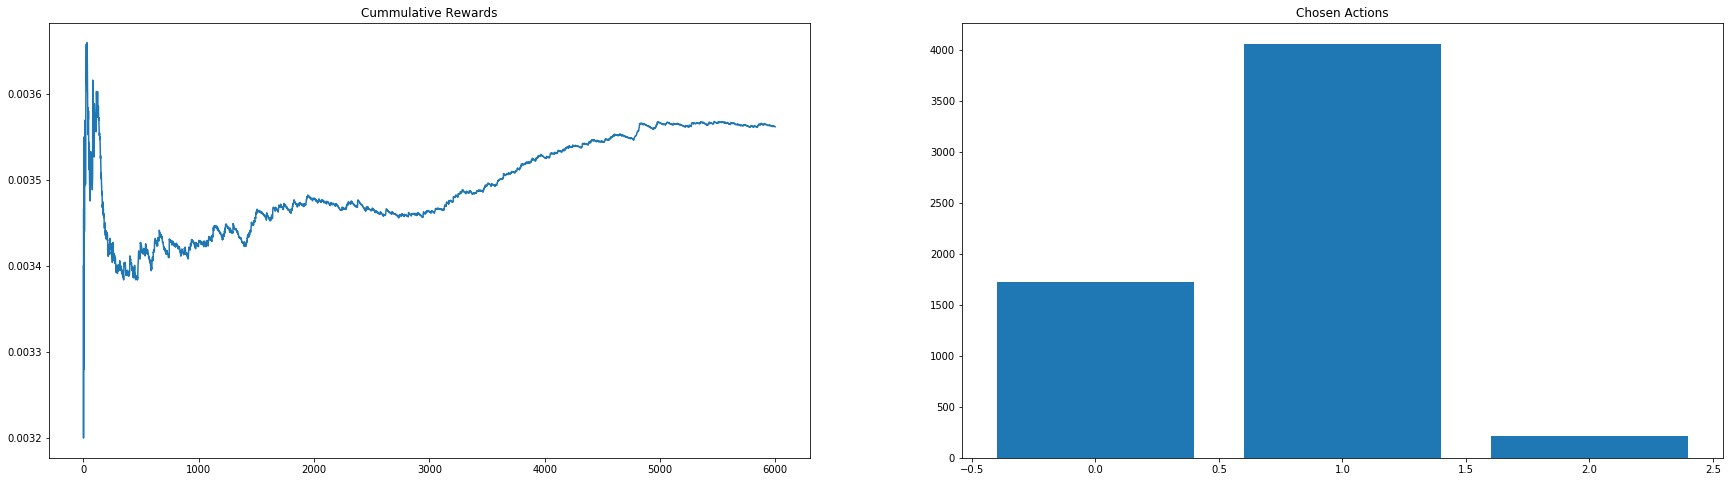

In [100]:
plot_history(rewards,cum_rewards, arm_counts)